# Transform
## Use this notebook to visualize a trained style image model

This notebook will load a trained style image model and apply it to several example content images.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from trainer.utils.utils import load_img, imshow
from trainer.models.transformer import transformer_model

In [2]:
model = transformer_model()

created


In [3]:
# load trained style from trained_models/trained/
model.load_weights('trained_models/trained/starryin_resizestyle_sw5_cw1_tv1e-3_coco.h5')

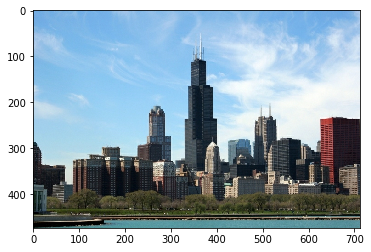

In [4]:
my_img = load_img('images/input/chicago.jpg')
imshow(my_img.numpy().astype('uint8'))

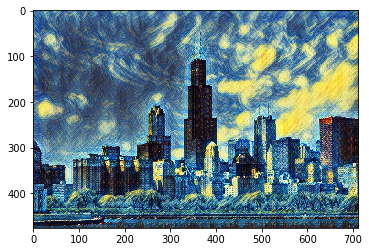

In [5]:
results = model.predict(my_img)
imshow(results[0].astype(np.uint8))

In [6]:
# save output image
output = tf.dtypes.cast(results[0], tf.uint8)
encoded_str = tf.image.encode_jpeg(tf.squeeze(output),quality=100)
tf.io.write_file('images/outputs/chicago_starry.jpg', encoded_str)

## More visualizations

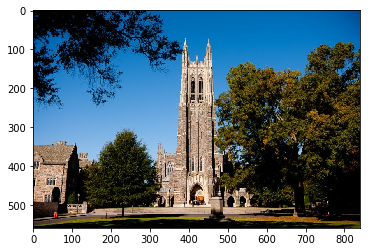

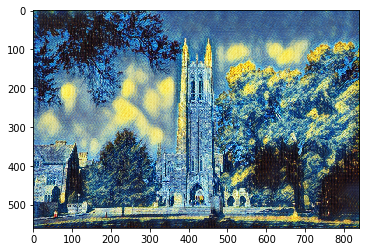

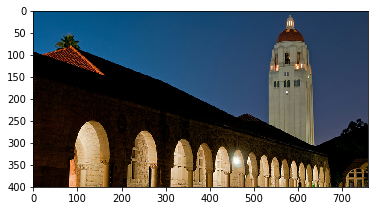

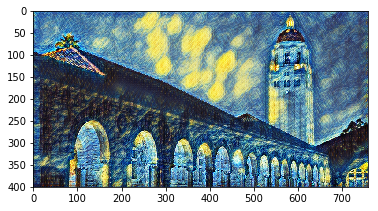

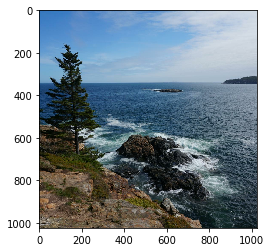

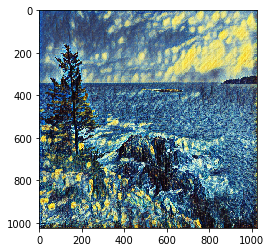

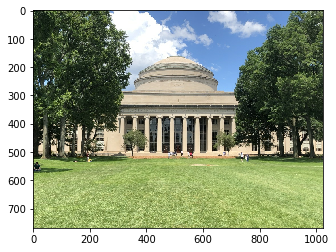

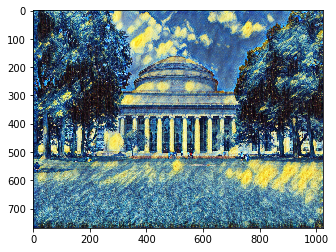

In [8]:
my_imgs_str = ['images/input/chapel.jpeg',
               'images/input/hoovertowernight.jpg',
               'images/input/maine.jpg',
               'images/input/mit.jpeg']
my_imgs = [load_img(x) for x in my_imgs_str]
for img in my_imgs:
    plt.figure()
    imshow(img.numpy().astype('uint8'))
    plt.figure()
    results = model.predict(img)
    imshow(results[0].astype(np.uint8))